In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model, load_model, model_from_json
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import skimage as sk
import time

from app.face_recognition import *
from app.database import *
from app.alignement import AlignDlib
from app.inception_blocks import *

# Data augmentation

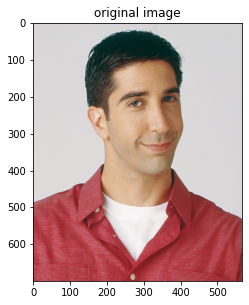

In [2]:
img_path = 'C:\\Users\\BARKEOUI AHMED\\Real_time_facial_recognition_system\\files\\Ross_0.jpg'
img_orig = importer_image(img_path)
img_noisy = 'C:\\Users\\BARKEOUI AHMED\\Real_time_facial_recognition_system\\Libraries\\add_noise.jpg'
img_orig_noisy = importer_image(img_noisy)
fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(431)
ax1.set_title('original image')
plt.imshow(img_orig)

plt.tight_layout()

### Transformations

In [3]:
img_rotate = rotation_randomly(img_orig)
img_shear = shear_randomly(img_orig)
img_contrast = change_contrast(img_orig, percent_change=(10,20))
img_gamma = correction(img_orig,gamma_range=(0.5,0.6))
blur_image = blur_image(img_orig)
add_noise = add_noise(img_orig)
flip_horizontal = flip_horizontal(img_orig)
remove_noise = remove_noise(img_orig_noisy)

### Add noise

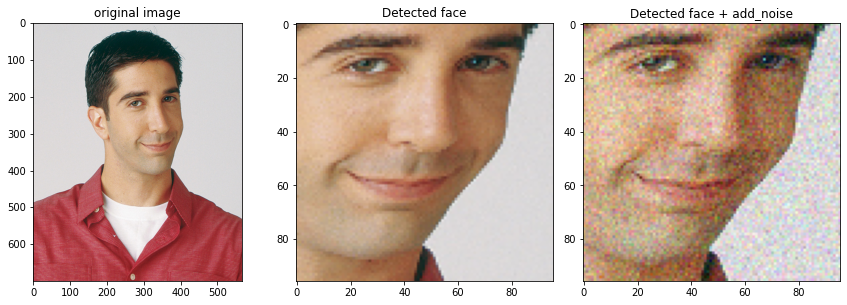

In [4]:
fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(431)
ax1.set_title('original image')
plt.imshow(img_orig)

ax2 = fig.add_subplot(432)
ax2.set_title('Detected face')
plt.imshow(aligned_face(img_orig))

ax3 = fig.add_subplot(433)
ax3.set_title('Detected face + add_noise')
plt.imshow(aligned_face(add_noise))

plt.tight_layout()

### Add blur

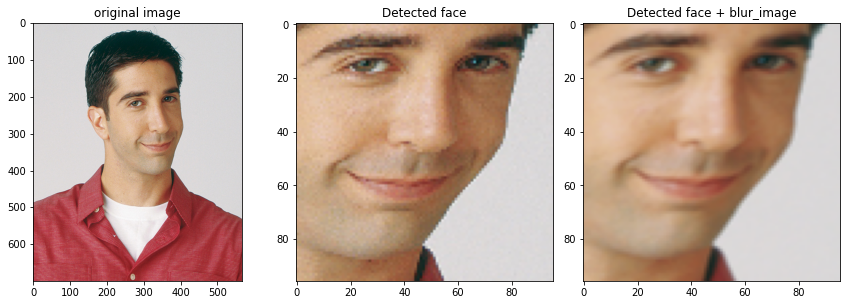

In [5]:
fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(431)
ax1.set_title('original image')
plt.imshow(img_orig)
ax2 = fig.add_subplot(432)
ax2.set_title('Detected face')
plt.imshow(aligned_face(img_orig))
ax3 = fig.add_subplot(433)
ax3.set_title('Detected face + blur_image')
plt.imshow(aligned_face(blur_image))

plt.tight_layout()

### Change contrast

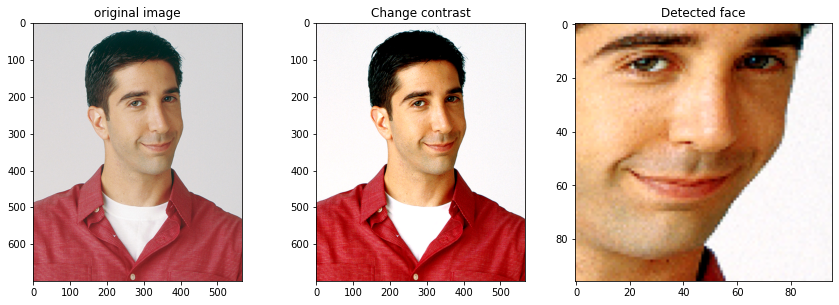

In [6]:
fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(431)
ax1.set_title('original image')
plt.imshow(img_orig)

ax2 = fig.add_subplot(432)
ax2.set_title('Change contrast')
plt.imshow(img_contrast)

ax3 = fig.add_subplot(433)
ax3.set_title('Detected face')
plt.imshow(aligned_face(img_contrast))

plt.tight_layout()

### Gamma correction

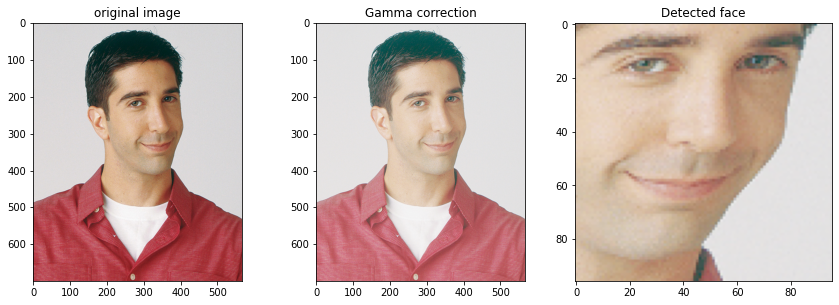

In [7]:
fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(431)
ax1.set_title('original image')
plt.imshow(img_orig)

ax3 = fig.add_subplot(432)
ax3.set_title('Gamma correction')
plt.imshow(img_gamma)

ax6 = fig.add_subplot(433)
ax6.set_title('Detected face')
plt.imshow(aligned_face(img_gamma))

plt.tight_layout()

### Random Rotation

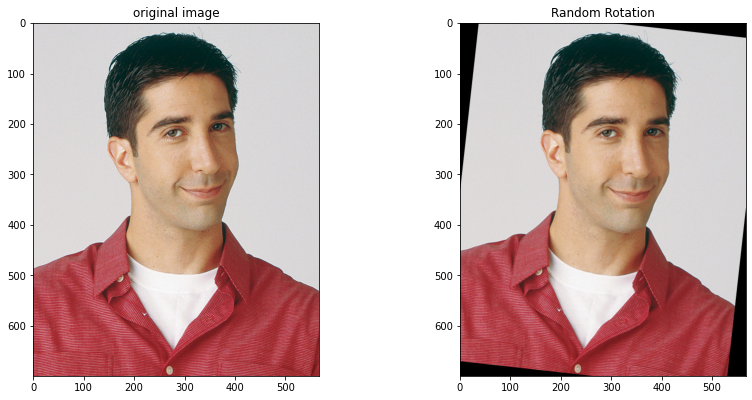

In [8]:
fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(321)
ax1.set_title('original image')
plt.imshow(img_orig)

ax3 = fig.add_subplot(322)
ax3.set_title('Random Rotation')
plt.imshow(img_rotate)

plt.tight_layout()

### Random Shear

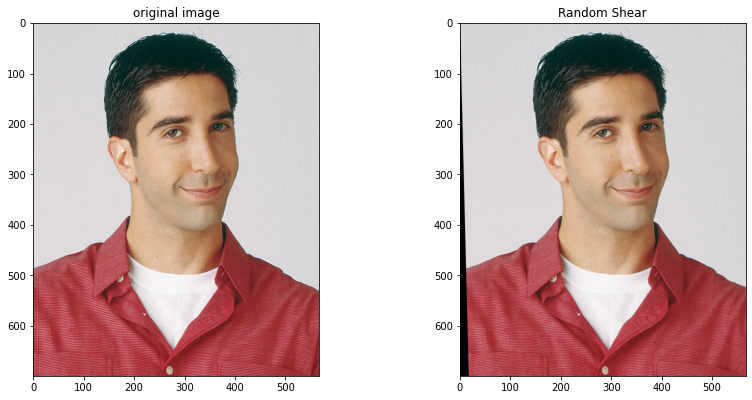

In [9]:
fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(321)
ax1.set_title('original image')
plt.imshow(img_orig)

ax3 = fig.add_subplot(322)
ax3.set_title('Random Shear')
plt.imshow(img_shear)

plt.tight_layout()

### Remove noise 

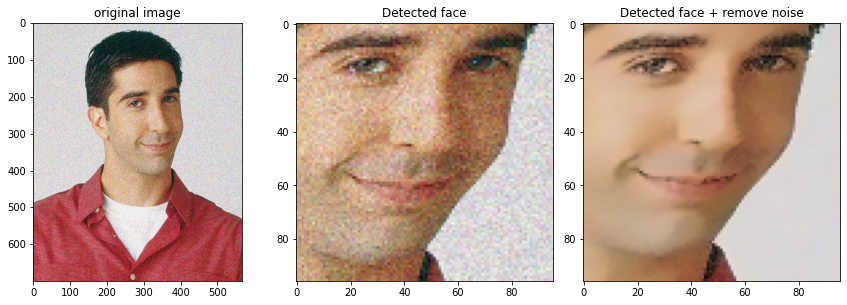

In [10]:
fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(431)
ax1.set_title('original image')
plt.imshow(img_orig_noisy)
ax2 = fig.add_subplot(432)
ax2.set_title('Detected face')
plt.imshow(aligned_face(img_orig_noisy))
ax3 = fig.add_subplot(433)
ax3.set_title('Detected face + remove noise')
plt.imshow(aligned_face(remove_noise))

plt.tight_layout()

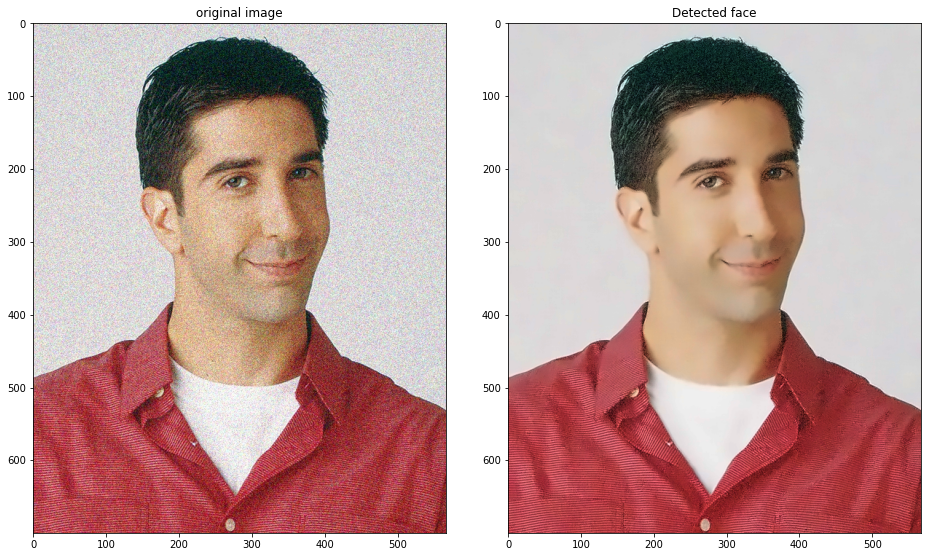

In [13]:
def remove_noisee(image):
    b,g,r = cv2.split(image)          
    rgb_img = cv2.merge([r,g,b]) 
    dst = cv2.fastNlMeansDenoisingColored(rgb_img,None,11,10,7,21)
    b,g,r = cv2.split(dst) 
    rgb_dst = cv2.merge([r,g,b])
    new_img = rgb_dst
    return new_img
remove_noisee = remove_noisee(img_orig_noisy)
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(431)
ax1.set_title('original image')
plt.imshow(img_orig_noisy)
ax2 = fig.add_subplot(432)
ax2.set_title('Detected face')
plt.imshow(remove_noisee)

plt.tight_layout()